In [11]:
import sys
!{sys.executable} -m pip install requests


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import json, requests


In [13]:
def convertToMeters(longitude, latitude):
    return ((85390*longitude), (111030*latitude))

def distance(pt1, pt2):
    dist1 = abs(pt1[0]-pt2[0])
    dist2 = abs(pt1[1] - pt2[1])
    x, y = convertToMeters(dist1,dist2)
    ## print x,y
    return np.sqrt((x**2+y**2))

def findClusters(df):
    data = df.values
    cluster = []
    clusters = []
    startPt = data[0]
    
    for i in range(1, len(data)):
        if distance(startPt, data[i]) <= 100:#改
            #print 'Added line'
            cluster.append(list(data[i]))
        elif len(cluster) > 0 and abs(cluster[0][2] - cluster[-1][2]) > 900:
            clusters.append(cluster)
            cluster = []
            startPt = data[i]
            #print 'Added cluster'
        else:
            startPt = data[i]
    #print abs(cluster[0][2] - cluster[-1][2])
    #print len(cluster) > 0
    if len(cluster) > 0 and abs(cluster[0][2] - cluster[-1][2]) > 900:
        #print 'Added cluster'
        clusters.append(cluster)
    return clusters

def haversine(coord1, coord2):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = (coord1[0],coord1[1])
    lon2, lat2 = (coord2[0]),coord2[1]
    

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    meters = R * c  # output distance in meters
    
    return meters

def findPlaces(lat, lon, limit, radius):
    url = 'https://api.foursquare.com/v2/venues/search'
    
    params = dict(
      client_id='I3BLAOGSSEKA1TLM2TEAFPGMYOPZTZTBVKQZB4PCUCQL0YL5',
      client_secret='TLTRDLLL30N4K40DK3PFS20LHCG01CSMZSGJZI12WQKFDXSH',
      v='20180323',
      ll=str(lon)+','+str(lat),
      limit=str(limit),
      radius=str(radius)
    )
    resp = requests.get(url=url, params=params)
    data = json.loads(resp.text)
    return data

def parseJSON(json_data):
    places = []
    venues = json_data['response']['venues']
    for i in range(0, len(venues)):
        venue = venues[i]
        try:
            name = venue['name']
        except:
            name = None
        try:
            address = venue['location']['address']
        except:
            address = None
        try:
            city = venue['location']['city']
        except:
            city = None
        places.append([name,address,city])
    return places


            X          Y          time
0  115.923130  28.651311  1.533053e+09
1  115.923106  28.651248  1.533053e+09
2  115.923108  28.651248  1.533053e+09
3  115.923110  28.651243  1.533053e+09
4  115.923113  28.651246  1.533053e+09


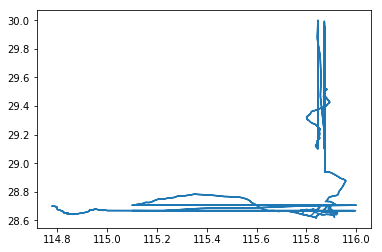

In [14]:
df = pd.read_csv('Data/gps_data1.csv').filter(items=['X','Y','time'])

print (df.head())
#plt.plot (df['X'])
#plt.plot(df['Y'])
plt.plot(df['X'],df['Y'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Number of Clusters: 60
[115.91984216454226, 28.653098428736953]
[115.86985222623348, 28.664616187725464]
[115.85307000958642, 28.689102558005953]
[115.837738778161, 28.68092317471267]
[115.7995784442011, 28.6745652231948]
[115.78520888190971, 28.673113766331593]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[115.77648300110673, 28.67305439889461]
[115.78781015309818, 28.660301546780016]
[115.82909455238067, 28.654417785714134]
[115.87513150000005, 28.64836864267987]
[115.92344142384194, 28.650538054635557]
[115.9003844892086, 28.656845830935282]
[115.88658586244017, 28.691099614832538]
[115.90859089692103, 28.763095000000014]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[115.9278736729471, 28.89454756931356]
[115.87028435034017, 28.998733612244898]
[115.84798455585069, 29.181571753989477]
[115.82279584667576, 29.318170131614643]
[115.87973224269408, 29.416042969504506]
[115.87531069403944, 29.50202270993377]
[115.88004813962189, 29.516425890565937]
[115.87906421833563, 29.507973879372745]
[115.87535393904015, 29.416189178988322]
[115.82129927125494, 29.31897700000002]
[115.84724783646098, 29.176253426273437]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[115.86240623622047, 29.06464545669292]
[115.91314255376356, 28.913031737903225]
[115.9115493551021, 28.77725279455787]
[115.88728058425569, 28.695315386223914]
[115.87390328048836, 28.66081055543243]
[115.89736205917174, 28.650364938461546]
[115.92191270110193, 28.651117975206233]
[115.91076243315463, 28.644983811497276]
[115.90660836633705, 28.633121304455297]
[115.91417620470558, 28.637729298823547]
[115.92412099428573, 28.650733360000054]
[115.90855235328875, 28.659913981607943]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[115.88189112421595, 28.642416629862026]
[115.7811816855669, 28.64349074871135]
[115.63205840832192, 28.688638257477333]
[115.45035983821496, 28.770536825662447]
[115.23801129189928, 28.752023889664773]
[115.11672479470204, 28.686720877483395]
[114.92657803192857, 28.663709151979525]
[114.84032855825245, 28.649844000000005]
[114.8013652298437, 28.68328876895304]
[114.77813996778426, 28.699131461744887]
[114.79097779751362, 28.698002119005466]
[114.81458097104942, 28.669163895054265]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[114.85791172515347, 28.647993406134987]
[114.97017812164064, 28.670087113154114]
[115.15399797304573, 28.716583361185982]
[115.29653750909084, 28.76691919999996]
[115.51191539385475, 28.754377522346342]
[115.68213183011606, 28.670269507078487]
[115.83419003389804, 28.639830363196094]
[115.89424362514153, 28.664006096262693]
[115.90216779272305, 28.67094307938271]
[115.88945742729919, 28.681039842730044]
[115.8932308207794, 28.693469498701205]


Text(0.5, 0, 'Time')

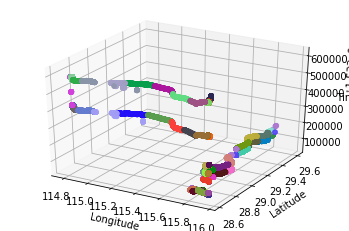

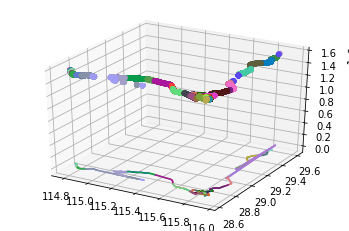

In [19]:
clusters = findClusters(df)
num_clusters = len(clusters)
print ('Number of Clusters: '+str(num_clusters))

cluster_centers = []

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')


for i in range(0, num_clusters):
    color = [c[0] for c in np.random.rand(3,1)]
    #print (color)
    cluster_df = pd.DataFrame(data=clusters[i], columns=['X','Y','time'])
    cluster_centers.append([np.mean(cluster_df['X']),np.mean(cluster_df['Y'])])
    print([np.mean(cluster_df['X']),np.mean(cluster_df['Y'])])
    ax.scatter(cluster_df['X'],cluster_df['Y'], cluster_df['time'], c=color)
    plt.plot(cluster_df['X'],cluster_df['Y'],c=color)
    

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')

In [74]:
centroid_place_data = []
for i in range(0, len(cluster_centers)):
    json_data = findPlaces(lat=cluster_centers[i][0],lon=cluster_centers[i][1],limit=2,radius=10)#limit为记录限制查找的大小，radius为半径
    #print json.dumps(json_data, indent=4, sort_keys=True)
    parsed = parseJSON(json_data)
    print(parsed)
    centroid_place_data.append(parsed)
#print (centroid_place_data)

[['Nanchang (南昌)', None, None], ['麦德龙', '青云谱区洪都南大道368号', '南昌市']]
[['Cafè Asia', None, '南昌市'], ['江西省博物馆', '东湖区新洲路2号', '南昌市']]
[['红谷滩会展中心', None, None], ['红谷滩绿地', None, None]]
[['百盛购物中心（绿地）', None, None], ['绿地中心', None, '南昌市']]
[['小柴米', None, '南昌市'], ['Caigou SuperCenter', 'qianfu dadao', '南昌市']]
[['International Exchange College Building', 'Nanchang University', '南昌市'], ['前湖迎宾馆', None, '南昌市']]
[['International Exchange College Building', 'Nanchang University', '南昌市'], ['前湖迎宾馆', None, '南昌市']]
[['南昌大学', '红谷滩新区学府大道999号', '南昌市'], ['小柴米', None, '南昌市']]
[['南昌海关', None, None], ['山姆会员店', None, '南昌市']]
[['Nanchang (南昌)', None, None], ['南昌佳美美容医院', '青云谱区洪都南大道273号', '南昌市']]
[['绳金塔', None, '南昌市'], ['绳金塔仿古街', None, '南昌市']]
[['Pavilion of Prince Teng (滕王阁)', '东湖区仿古街36号', '南昌市'], ['Le Bistro 100', '100 Rongmen Road', '南昌市']]
[['山庄', None, None], ['Gate 217', None, '南昌市']]
[['共青城切尔咖啡', None, None], ['共青城市政府', None, '九江市']]
[['天黑黑', '不知道哪儿', None], ['德安县雕刻时光', None, None]]
[['东林大佛', None, None], ['秀峰', N